In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

In [2]:
data = pd.read_csv("../../data/heart.csv")
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


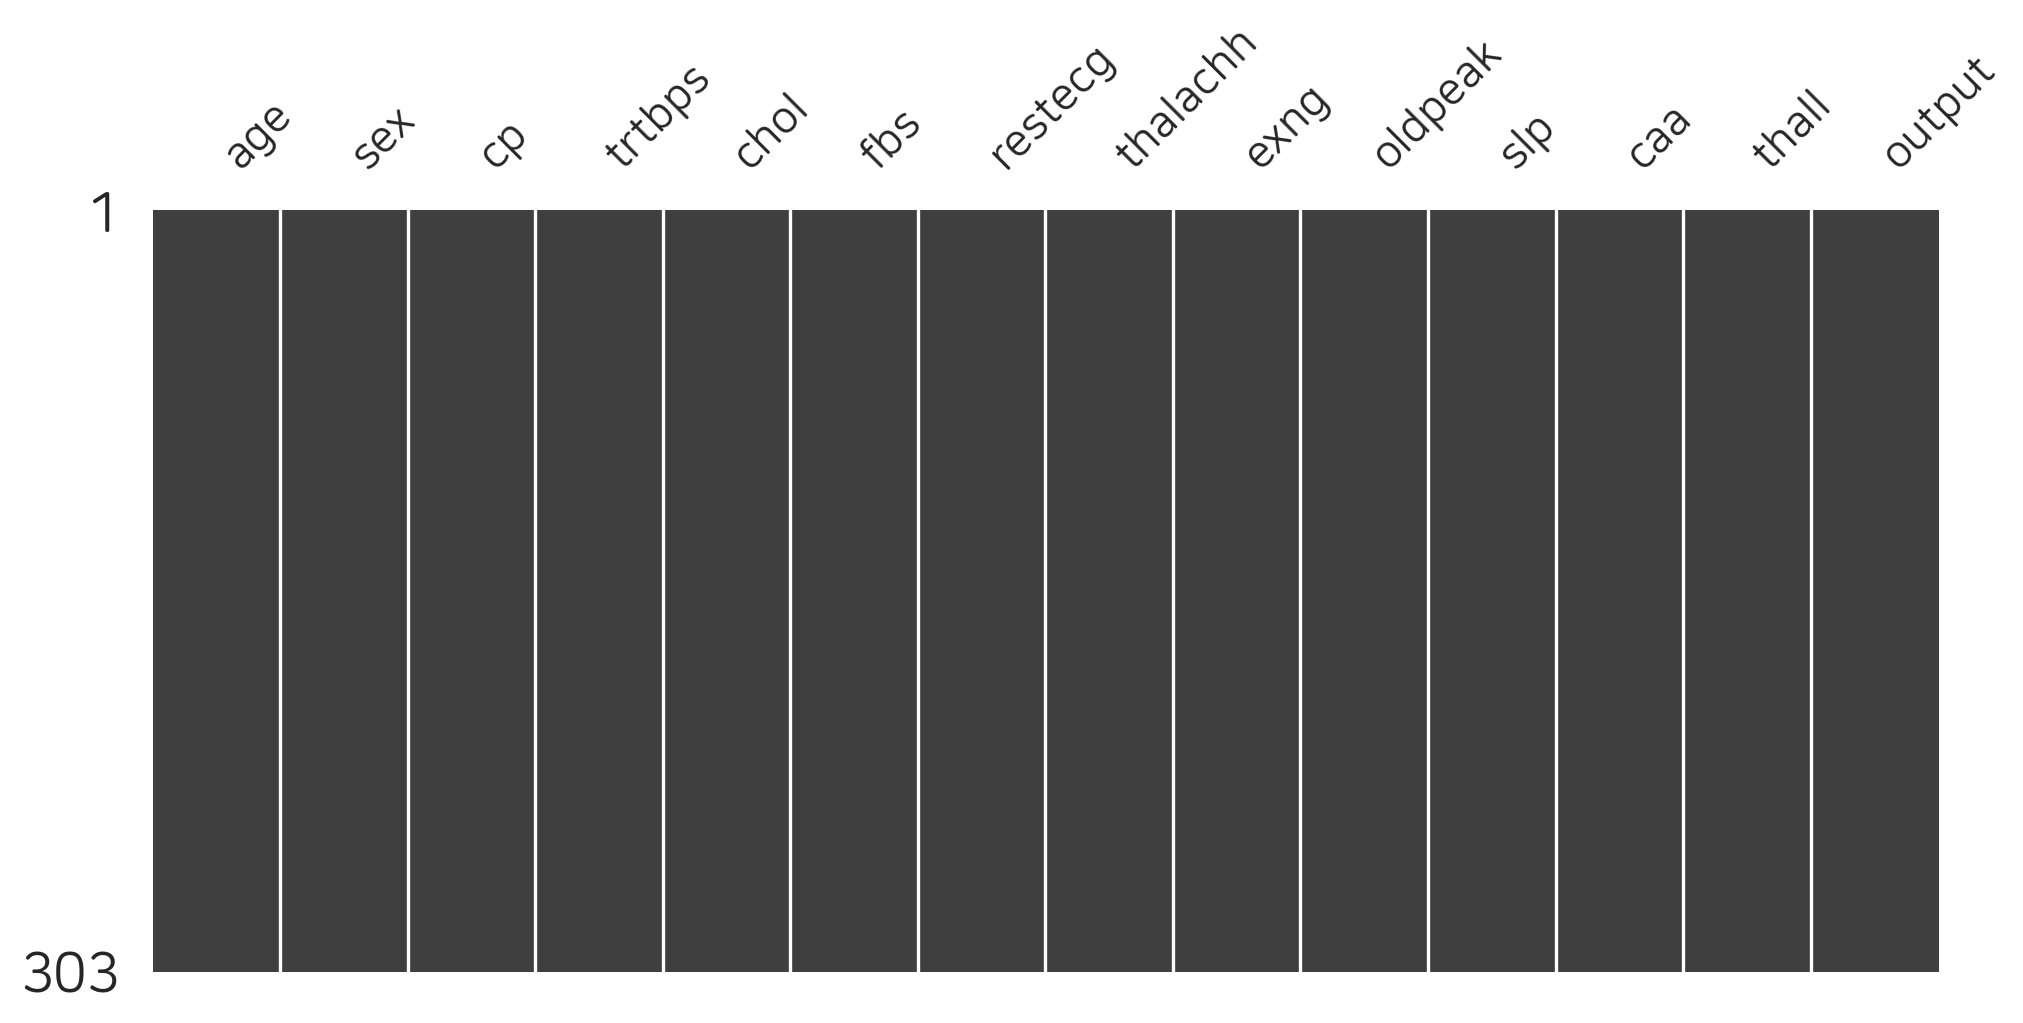

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

#결측치 노이즈 확인
fig, ax = plt.subplots(figsize=(10,5))
msno.matrix(data, sparkline=False, ax=ax);

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(columns="output")
y = data["output"]

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

minmax_scaler = StandardScaler()
x_train = minmax_scaler.fit_transform(x_train) # 트레인 데이터로만 fit_transform
x_test = minmax_scaler.transform(x_test) # 테스트 데이터로만 transform

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (212, 13)
y_train:  (212,)
x_test:  (91, 13)
y_test:  (91,)


In [7]:
import tensorflow as tf

2024-10-18 17:11:03.968346: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 17:11:03.984615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 17:11:03.989417: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 17:11:04.001693: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 17:11:04.659441: W tensorflow/compiler/tf2

In [8]:
tf.keras.Input

<function keras.src.layers.core.input_layer.Input(shape=None, batch_size=None, dtype=None, sparse=None, batch_shape=None, name=None, tensor=None, optional=False)>

### 딥러닝 간단한 층 쌓기

In [9]:
input_shape = (13,)
inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Dense(32, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)

for _ in range(0,3,1):
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

I0000 00:00:1729239065.175880  307067 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 17:11:05.218932: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy')

### 콜백
* 학습 과정 중 어떤 작업(모델 저장이나 조기 종료)을 할 수 있도록 하는 클래스들

- **ModelCheckpoint**
    * 기본적으로 에포크마다 모델을 저장
    * save_best_only = True를 통해 검증 데이터에 대해서 가장 정확도가 높은 모델 저장

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 설정
checkpoint = ModelCheckpoint('model_check_point.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1)

### EarlyStopping

* validataion loss가 상승하면 모델이 과대적합(학습 데이터에는 정확도가 높지만 검증이나 테스트에서 정확도가 낮음)되고 있다는 의미
* validation loss가 상승하기 시작하면 더이상 학습을 진행하는 것은 의미가 없음
* validation loss가 상승하면 학습을 멈추도록 설정할 수 있음

* patience = 2: 연속 2번 validation loss가 줄지 않으면 학습을 멈춤
* restore_best_weights = True면가장 낮은 validation loss가 되었던 모델 파라미터로 되돌림

In [13]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               verbose=1,
                               restore_best_weights=True)


In [14]:
# 훈련
history = model.fit(x_train, y_train,
                    epochs=1000,
                    validation_split=0.2,
                    batch_size=4,
                    callbacks=[checkpoint, early_stopping],
                    verbose=1)

Epoch 1/1000
 1/43 ━━━━━━━━━━━━━━━━━━━━ 37s 886ms/step - loss: 0.6641
Epoch 1: val_loss improved from inf to 0.62334, saving model to model_check_point.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7162 - val_loss: 0.6233
Epoch 2/1000
 1/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5234
Epoch 2: val_loss improved from 0.62334 to 0.58531, saving model to model_check_point.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6293 - val_loss: 0.5853
Epoch 3/1000
 1/43 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6039
Epoch 3: val_loss improved from 0.58531 to 0.50748, saving model to model_check_point.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5536 - val_loss: 0.5075
Epoch 4/1000
 1/43 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5753
Epoch 4: val_loss improved from 0.50748 to 0.45374, saving model to model_check_point.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4865 - val_loss: 0.4537
Epoch 5/1000
 1/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6713
Ep

In [15]:
# 모델 불러오기 (필요할 경우)
from tensorflow.keras.models import load_model

model = load_model('model_check_point.keras')

In [16]:
# 평가
test_loss = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", test_loss)

Test Loss: 0.4778374135494232


In [17]:
# 예측
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


### 결과 확인

In [66]:
from sklearn import metrics

def scores(model, thr, pos_label=1):
    predd = model.predict(x_test, verbose=0) > thr
    acc = metrics.accuracy_score(predd ,y_test)
    prc = metrics.precision_score(predd,y_test, pos_label=pos_label)
    rec = metrics.recall_score(predd,y_test, pos_label=pos_label)
    f1s = metrics.f1_score(predd,y_test, pos_label=pos_label)

    return  acc, prc, rec, f1s

print("라벨 1 에 대하여")
print(f"{'Model Name':<20} {'accuracy':<20} {'precision':<20} {'recall':<20} {'f1 score':<20}")
print("-"*100)
for i in np.arange(0.1,1.,0.1):
    name = f"threshold : {i:0.2f}"
    acc_, prc_ ,rec_, f1s_ = scores(model, i)
    print(f"{name:<20} {acc_:<20.2f} {prc_:<20.2f} {rec_:<20.2f} {f1s_:<20.2f}") #:<20 :<10.2f :<10.2f

라벨 1 에 대하여
Model Name           accuracy             precision            recall               f1 score            
----------------------------------------------------------------------------------------------------
threshold : 0.10     0.73                 0.96                 0.68                 0.79                
threshold : 0.20     0.79                 0.90                 0.76                 0.83                
threshold : 0.30     0.82                 0.86                 0.83                 0.84                
threshold : 0.40     0.82                 0.82                 0.85                 0.84                
threshold : 0.50     0.80                 0.78                 0.85                 0.81                
threshold : 0.60     0.77                 0.70                 0.85                 0.77                
threshold : 0.70     0.71                 0.54                 0.90                 0.68                
threshold : 0.80     0.58                 0.28  

In [67]:
# For label 0
print("라벨 0 에 대하여")
print(f"{'Model Name':<20} {'accuracy':<20} {'precision':<20} {'recall':<20} {'f1 score':<20}")
print("-" * 100)
for i in np.arange(0.1,1.,0.1):
    name = f"threshold : {i:0.2f}"
    acc_, prc_, rec_, f1s_ = scores(model, i, pos_label=0)
    print(f"{name:<20} {acc_:<20.2f} {prc_:<20.2f} {rec_:<20.2f} {f1s_:<20.2f}");

라벨 0 에 대하여
Model Name           accuracy             precision            recall               f1 score            
----------------------------------------------------------------------------------------------------
threshold : 0.10     0.73                 0.44                 0.90                 0.59                
threshold : 0.20     0.79                 0.66                 0.84                 0.74                
threshold : 0.30     0.82                 0.78                 0.82                 0.80                
threshold : 0.40     0.82                 0.83                 0.79                 0.81                
threshold : 0.50     0.80                 0.83                 0.76                 0.79                
threshold : 0.60     0.77                 0.85                 0.70                 0.77                
threshold : 0.70     0.71                 0.93                 0.62                 0.75                
threshold : 0.80     0.58                 0.95  

### 과적합 시작점 확인

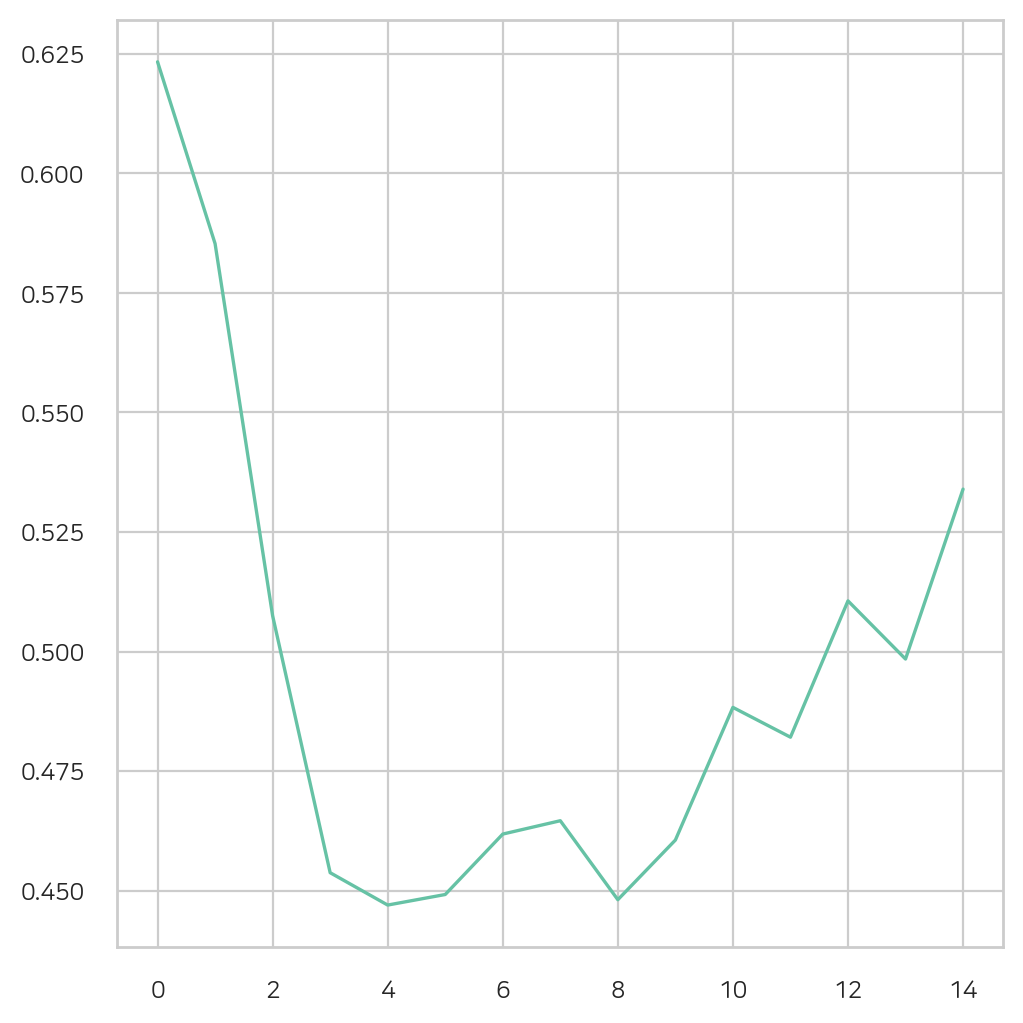

In [69]:
fig, ax = plt.subplots(figsize=(5,5))

sns.lineplot(history.history["val_loss"], ax = ax);